In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import random

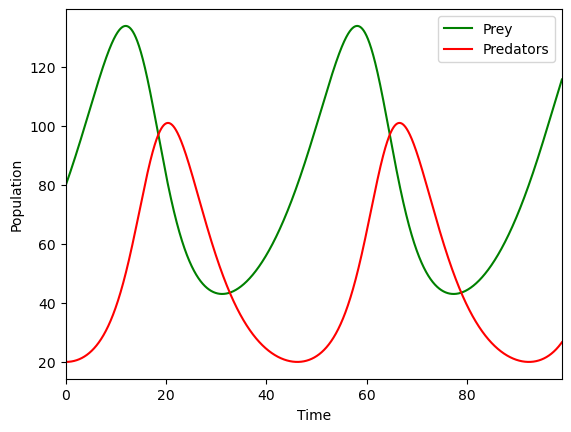

<module 'matplotlib.pyplot' from 'c:\\Users\\User\\anaconda3\\envs\\school\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [3]:
# 1a closed form

def lotka_volterra(alpha=.1, beta=.002, gamma=.2, delta=.0025, startpop=(80,20),
                   dt=.0001):
    ''' 
    Tbd
    '''
    preypop, predpop = startpop # unpacking tuple
    # lists to store history
    timehist = [0]
    preyhist = [preypop]
    predhist = [predpop]
    # defining iteration range per value of dt
    time = 100
    iterations = int(time/dt)

    for _ in range(iterations):
        # equations
        preychange = (((alpha*preypop) - (beta*(preypop*predpop))) * dt)
        predchange = ((-(gamma*predpop) + (delta*(preypop*predpop))) * dt)
        # incrementing pops for next iteration
        preypop += preychange
        predpop += predchange
        # appending to history
        timehist.append(timehist[-1] + dt)
        preyhist.append(preypop)
        predhist.append(predpop)

    # plotting results
    plt.figure()
    plt.plot(timehist, preyhist, color='green', label='Prey')
    plt.plot(timehist, predhist, color='red', label='Predators')
    plt.xlim(min(range(time)), max(range(time)))
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()
    return plt

lotka_volterra()

1b writeup

the stable states can be found by setting the equations (rates of change) to zero and solving, which yields -- apart from the "everyone dead" scenario -- a state where y = a/B and x = gamma/delta. These represent a state where the birth rate of prey matches the predation rate and the death rate of predators matches the growth rate. To illustrate, I created a contrived scenario where each of these conditions are met: [img]

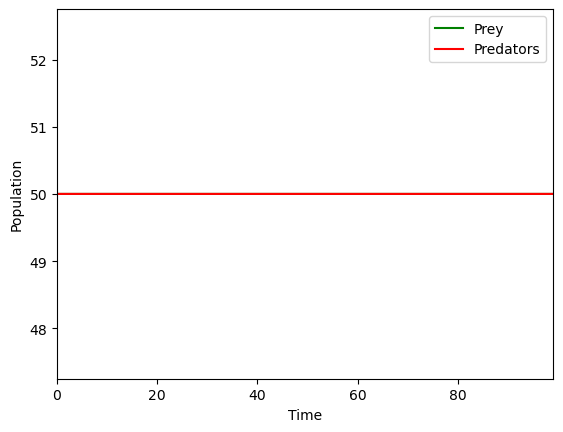

In [ ]:
# 1b sensitivity analysis

lotka_volterra(alpha=0.25, beta =0.005, gamma=0.1, delta=0.002, startpop=(50,50))

1c

tbd

In [ ]:
# 2a network version

def graphLotkaVolterra(G, prey=.5, pred=.1 alpha=.1, beta=.002, gamma=.2, delta=.0025, T=100):
    '''' 
    
    '''
    if prey + pred > 1:
        print("Error: ratio must not be greater than 1")
        return None
    # setup to init node states
    numnodes = int(len(G.nodes))
    numprey = numnodes * prey
    numpred = numnodes * pred
    preynodes = random.sample(list(G.nodes()), numprey)
    prednodes = random.sample(list(G.nodes()), numpred)
    for t in range(T):
        for node in G.nodes():
            # helper function to select a random neighbor
            def neighbor_choice(node):
                choice = random.choice(nx.neighbors(G, node))
                return choice
            if node in preynodes:
                if random.random() <= alpha:
                    neighbor = neighbor_choice(node)
                    if neighbor not in prednodes or preynodes:
                        preynodes.append(neighbor)